In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping

In [3]:
dt = pd.read_csv("df_han_nak.csv")

In [4]:
dt2 = dt.iloc[:,4:]

In [5]:
dt2["경계발령"].unique()

array([0, 1], dtype=int64)

In [6]:
# 입력변수와 출력 변수 분리
X = dt2.drop(columns=['경계발령',"유해남조류 세포수 (cells/㎖)"])
y = dt2[["경계발령"]]

In [7]:
# 데이터를 훈련용과 검증용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
# 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# X_train_scaled = X_train
# X_test_scaled = X_test

In [9]:
# 모델 설계
model = Sequential()

model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
# EarlyStopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), 
                    epochs=1000, batch_size=64, callbacks=[early_stopping])


Epoch 1/1000
40/40 [==============================] - 1s 9ms/step - loss: 0.4855 - accuracy: 0.9439 - val_loss: 0.2998 - val_accuracy: 0.9336
Epoch 2/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2488 - accuracy: 0.9439 - val_loss: 0.2706 - val_accuracy: 0.9336
Epoch 3/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2331 - accuracy: 0.9439 - val_loss: 0.2589 - val_accuracy: 0.9336
Epoch 4/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2245 - accuracy: 0.9439 - val_loss: 0.2486 - val_accuracy: 0.9336
Epoch 5/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2170 - accuracy: 0.9439 - val_loss: 0.2360 - val_accuracy: 0.9336
Epoch 6/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2086 - accuracy: 0.9439 - val_loss: 0.2242 - val_accuracy: 0.9336
Epoch 7/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1977 - accuracy: 0.9439 - val_loss: 0.2075 - val_accuracy: 0.9336
Epoch 

In [11]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', accuracy)

20/20 [==============================] - 0s 2ms/step - loss: 0.1264 - accuracy: 0.9558
Test accuracy: 0.9557662010192871


In [12]:
print('Test loss: ', loss)

Test loss:  0.1264045387506485


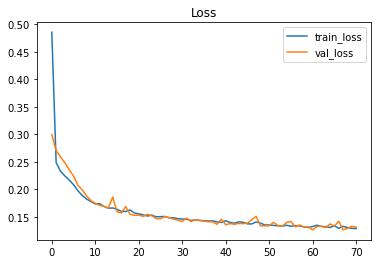

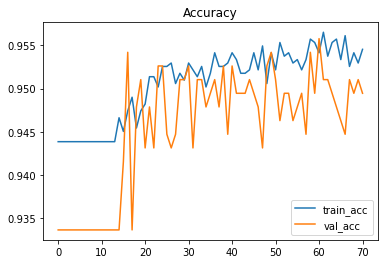

In [13]:
import matplotlib.pyplot as plt

# history 객체에서 손실값과 정확도를 추출합니다.
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# 손실값 그래프
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.legend()
plt.title('Loss')
plt.show()

# 정확도 그래프
plt.plot(train_acc, label='train_acc')
plt.plot(val_acc, label='val_acc')
plt.legend()
plt.title('Accuracy')
plt.show()
